# Neural Networks and Ensembles


## Neural Networks

Today we will explore *Neural Networks* and *Ensemble* methods. Neural Networks are heuristically designed to mimic the way networks of neurons in an organism's brain make decisions, or at least the way we think they do. So we will start with a review of how single neurons and small networks of neurons behave.

<img src='Images/2-whyareneuron.jpg' width='480'/>

A neuron consists of a Soma with Dendrites connected to an Axon with Terminals. The dendrites receive stimulation in the form of neurotransimitters that act to increase the charge held in the Soma. When the charge in the Soma reaches a critical threshhold, a signal in the form of other neurotransmitters is passed by a chemical reaction in a wave down the axon causing the axon terminals to realease neurotransmitters. 

Networks of neurons work together in chains by receiving input in the form of stimulation increasing (or decreasing) their charge, and once they hit a critical threshold communicating stimulation to other neurons in the network. We believe that patterns of firing neurons are responsible for the decsion making processes we can observe in the brains of organisms. There is a lot we do not completely understand about how networks of neurons behave, and it is a complicated chemical and electrical process. There is even less we understand about how the particular patterns of firing neurons in a network represent or are used making decisions. The neural network model we will use here is based on some laboratory evidence of how the data collected by sensory ograns (eyeballs) are communicated to the relevant region of the brain. 

So our Machine Learning algorithm modeled on this is made up of *nodes* set up in layers that collect input that either increases or decreases their excitation level, and if they reach a threshold of excitation they then communicate a signal to the next layer that either increases or decreases excitation levels of some of the nodes in that layer. The network starts with a layer that takes as its inputs values for the features we are using as predictors, and the final layer is a node or nodes that give the output (either a classification or regression). The number and sizes of the layers is a parameter set when the model is defined, and then the coefficients giving the strength of each signal passed from node-to-node are trained to fit the network to the training data using a steepest descent method to find the best choice of parameters.

<img src='Images/nn.png' width='480'/>

Why do neural networks work? Well first they can be trained to work well with training data. They are very flexible and will adapt to nonlinearity in the data. Because the nodes and layers incorportate information from the previous layers in a nonlinear way they are protected from overfitting. 

What is the downside to neural networks? Because of the number of coefficients and their nonlinear relationship there are multiple local minimums and the steepest descent method will not necessarily find the best one. There is some randomness in the training of the model that can result in different minimums being found. The other downside, similar to the *boosting* and *random forest* ensemble models we saw already is that neural networks are hard to interpret.

For example. I have found that a neural network with two layers of 100 nodes would do a good job of predicting which students in *Mathematics for Liberal Arts* need additional support. However we cannot use a neural network as placement mechanism (well not easily anyway, how would we explain to a student what they can do to improve their placement?).

We will do a couple of examples of using a Neural Network with two predictors because it will let us draw some nice graphs of the result; however the real power of the method is when there are a large number of predictors.

## Horsepower Data

In [1]:
import pandas as pa
import matplotlib.pyplot as plt
import matplotlib.colors as pltco
import numpy as np

In [2]:
mpg = pa.read_csv('Data Sets/auto-mpg.csv', names=['mpg', 'cylinders', 'displacement', 'horsepower', 
                                                   'weight', 'acceleration', 'model year', 'origin', 'car name'])
mpg.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"\t""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"\t""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"\t""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"\t""ford torino"""
5,15.0,8,429.0,198,4341,10.0,70,1,"\t""ford galaxie 500"""
6,14.0,8,454.0,220,4354,9.0,70,1,"\t""chevrolet impala"""
7,14.0,8,440.0,215,4312,8.5,70,1,"\t""plymouth fury iii"""
8,14.0,8,455.0,225,4425,10.0,70,1,"\t""pontiac catalina"""
9,15.0,8,390.0,190,3850,8.5,70,1,"\t""amc ambassador dpl"""


In [3]:
mpg = mpg[mpg.horsepower!='?']
mpg.horsepower = mpg.horsepower.astype('int')

In [4]:
X = np.array(mpg[['horsepower', 'weight']])
y = np.array(mpg['mpg'])

In [5]:
import numpy.random as rn

One note here:  I've realized that we probably should be using a different permutation for each run even across multiple models so for this class I have moved the training/testing set division inside of the plot command. This also means that the fit for the model is in there as well. The function now returns the fitted model. 

In [6]:
# A bit of code for plotting the contour in a regression problem with two predictors
# Also prints out the training and testing errors

def plot_reg_model(reg, X, y):

    # We shuffle the data using a random permutation

    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       # Then create the test
    y_test = y[:test]
    X_train = X[test:]     # and train sets
    y_train = y[test:]
    
    reg.fit(X_train, y_train) # Fit the model
     
    nn = 200
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),   # Changed the function to use linspace rather than arrange
        np.linspace(y_min, y_max, nn))                    # This keeps us from having to adjust h.
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()]) # predict

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))
    
    return reg

Check how the existing regression algorithms from our toolbox do on this data:

In [7]:
from sklearn.linear_model import LinearRegression

Training R2: 0.711942189702614
Testing R2: 0.667476104070182


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

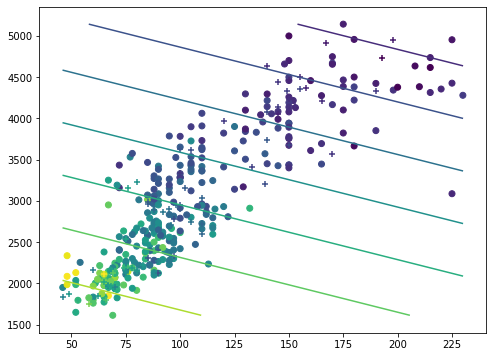

In [8]:
reg = LinearRegression()
plot_reg_model(reg, X, y)

In [9]:
from sklearn.linear_model import Ridge

Training R2: 0.7140576252740916
Testing R2: 0.6711554744588457


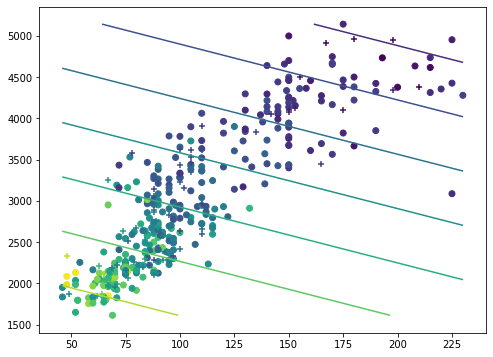

In [10]:
reg = Ridge(alpha=2)
plot_reg_model(reg, X, y);

In [11]:
from sklearn.linear_model import Lasso

Training R2: 0.7132216610058233
Testing R2: 0.6783850879137462


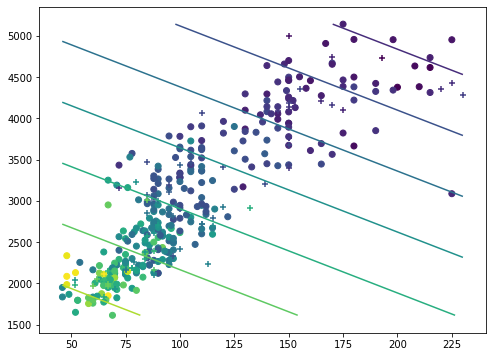

In [12]:
reg=Lasso(alpha=1)
plot_reg_model(reg, X, y);

Interestingly we get slightly better performance from Lasso depsite only using two features.

In [13]:
from sklearn.neighbors import KNeighborsRegressor

Training R2: 0.80769956998282
Testing R2: 0.6537913343408874


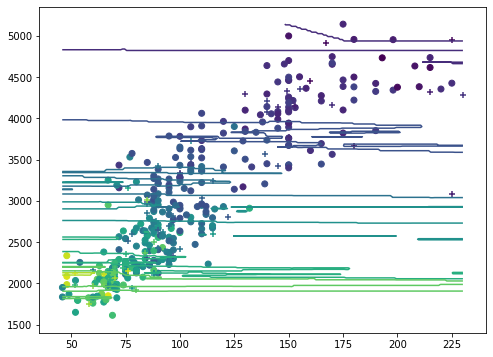

In [14]:
knn = KNeighborsRegressor(n_neighbors=6)
plot_reg_model(knn, X, y);

In [15]:
from sklearn.tree import DecisionTreeRegressor

Training R2: 0.7494647630761238
Testing R2: 0.780479220749952


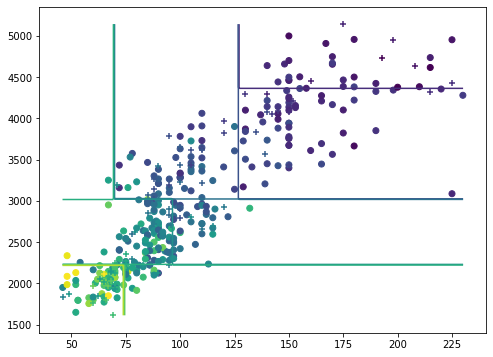

In [16]:
tree = DecisionTreeRegressor(max_depth=3)
plot_reg_model(tree, X, y);

### Ensemble Methods

The ensemble methods we learned last week (Random Forest and Boosting).

In [17]:
from sklearn.ensemble import RandomForestRegressor

Training R2: 0.7997612601527666
Testing R2: 0.6573446502936267


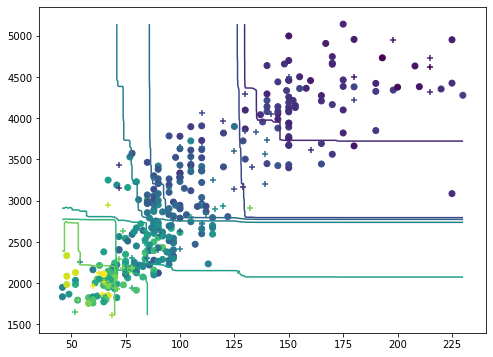

In [18]:
forest = RandomForestRegressor(n_estimators=100, max_depth=3, n_jobs=-1)
plot_reg_model(forest, X, y);

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

Training R2: 0.8744964961261694
Testing R2: 0.6384035701600421


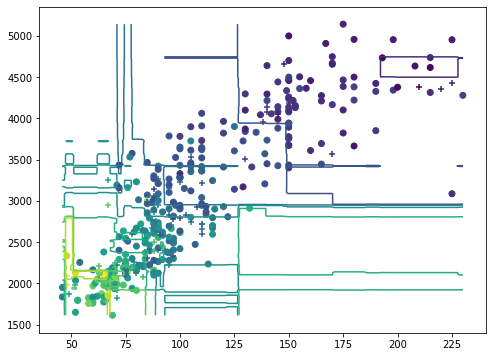

In [20]:
boost = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3)
plot_reg_model(boost, X, y);

## Neural Networks for Regression

Let's apply the *Multi-Layer Perceptron Regressor* from scikitlearn to this data. The model has parameters:

- *hidden_layer_sizes* gives the number of neurons in each layer other than input and output;
- *activation* for choosing the function to model the activation profiles for the hidden layers;
- *solver* giving the method for solving for the minimum, note the recomendation in the documentation to use 'adam' for large data sets and 'lbfgs' for smaller.
- *alpha* a $L^2$ penalty parameter (forcing regularization);

The trick is to develop a method for systemactically exploring the parameter space to develop the best model. Note that the hidden layer parameter is a list (tuple) of numbers giving the number of layers and the size of those layers.

Neural Networks are models that respond better after normalization so this is a recomended step for these cases.

In [21]:
v = [0]*X.shape[1]
for k in range(X.shape[1]):
    M = X[:, k].max()
    m = X[:, k].min()
    v[k] = (X[:, k] - m)/(M - m)
Xn = np.c_[v].transpose()   # Note I could not assign these to X because the type was int not float

In [22]:
from sklearn.neural_network import MLPRegressor

Training R2: 0.7755178141749761
Testing R2: 0.6889907109788982


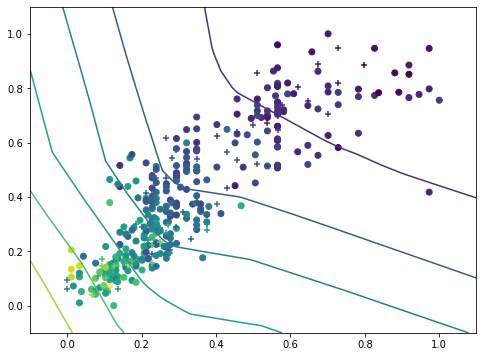

In [23]:
mlp = MLPRegressor(hidden_layer_sizes = (100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
plot_reg_model(mlp, Xn, y);

Adding an additional hidden layer for this problem improves performance.

Training R2: 0.778193614456023
Testing R2: 0.7050834640146222


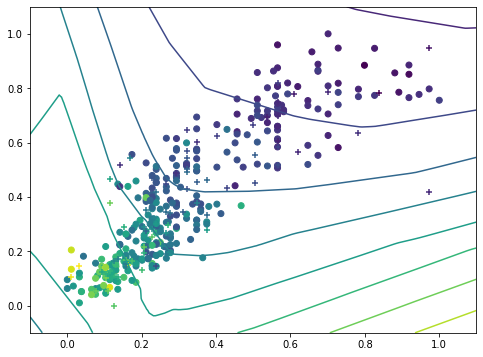

In [24]:
mlp = MLPRegressor(hidden_layer_sizes = (100, 100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
plot_reg_model(mlp, Xn, y);

So very quickly we get good performance. The resulting regression has some of the features of K-Nearest Neighbors, Decsision Trees, and Ensembles for this data but is smoother.

## Classification

For classification, we consider the Baseball Pitcher Classification.

In [25]:
# Read in the major league players data set

major = pa.read_csv('Data Sets/Major League Height-Weight.csv')   # creates a pandas Dataframe from a .csv file
major = major.rename({'Height(inches)':'Height', 'Weight(pounds)':'Weight'}, axis=1)  
major = major.drop(640, axis=0) 

# Each row of a data frame is a data point - in this case a player.
# Each column is a feature about the data point (its coordinates if you will)

major.head()   # displays the first few rows

,Name,Team,Position,Height,Weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [26]:
# We are going to make a dictionary of key:value pairs to recode the Position feature to 
# 'Pitcher' and 'Not Pitcher'

pos_dict = {x:1 for x in list(set(major.Position)) if 'Pitcher' in x}
pos_dict2 = {x:0 for x in list(set(major.Position)) if not 'Pitcher' in x}

# Using dictionary comprehensions

pos_dict.update(pos_dict2) # merge the two dictionaries

major_2 = major.copy()   # pandas.dataframe is a mutable object so we use the .copy() command 
                         # otherwise changes to major_2 will change major
    
major_2.Position = major_2.Position.map(pos_dict)  # use the dictionary we made to recode the values with .map()

major_2

,Name,Team,Position,Height,Weight,Age
0,Adam_Donachie,BAL,0,74,180.0,22.99
1,Paul_Bako,BAL,0,74,215.0,34.69
2,Ramon_Hernandez,BAL,0,72,210.0,30.78
3,Kevin_Millar,BAL,0,72,210.0,35.43
4,Chris_Gomez,BAL,0,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,1,73,190.0,25.08
1030,Tyler_Johnson,STL,1,74,180.0,25.73
1031,Chris_Narveson,STL,1,75,205.0,25.19
1032,Randy_Keisler,STL,1,75,190.0,31.01


In [27]:
X = np.array(major_2[['Height', 'Weight']])
y = np.array(major_2['Position'])

In [28]:
# A bit of code for plotting the decision boundaries in a categorical problem with two predictors and two values for the result
# Also prints out the training and testing errors

def plot_cat_model(clf, X, y):

    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       # Then create the test
    y_test = y[:test]
    X_train = X[test:]     # and train sets
    y_train = y[test:]
    
    clf.fit(X_train, y_train) # Fit the model
    
    nn = 200 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),
        np.linspace(y_min, y_max, nn))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))

Check how the classification does on with the tools we have seen previously.

In [29]:
from sklearn.linear_model import LogisticRegression

Training Error: 0.6420798065296252
Testing Error: 0.6796116504854369


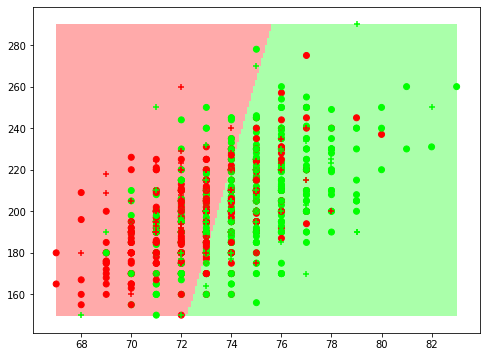

In [30]:
clf = LogisticRegression(solver = 'lbfgs')
plot_cat_model(clf, X, y)

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Training Error: 0.6481257557436517
Testing Error: 0.6310679611650486


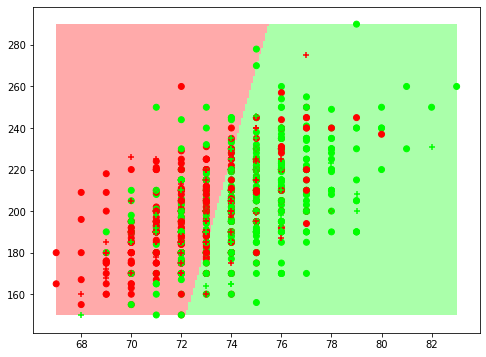

In [32]:
clf = LinearDiscriminantAnalysis()
plot_cat_model(clf, X, y)

In [33]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Training Error: 0.6614268440145102
Testing Error: 0.6650485436893204


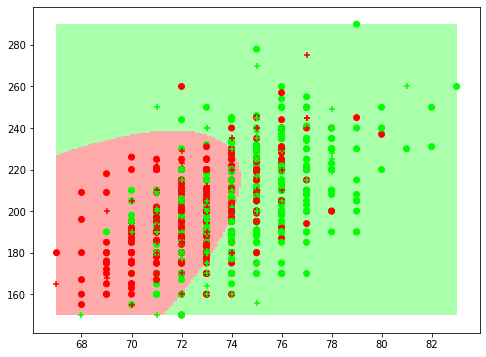

In [34]:
clf = QuadraticDiscriminantAnalysis()
plot_cat_model(clf, X, y)

In [35]:
from sklearn.svm import SVC

Training Error: 0.652962515114873
Testing Error: 0.6019417475728155


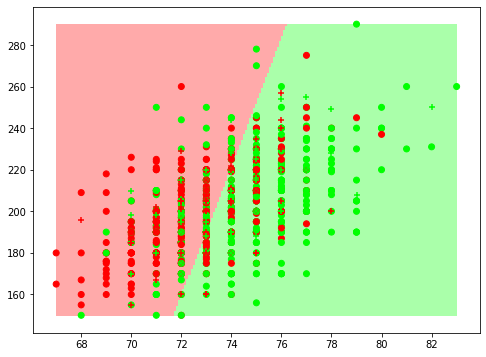

In [36]:
clf = SVC(C=1.0, gamma='auto', kernel='linear')
plot_cat_model(clf, X, y)

Training Error: 0.7230955259975816
Testing Error: 0.6553398058252428


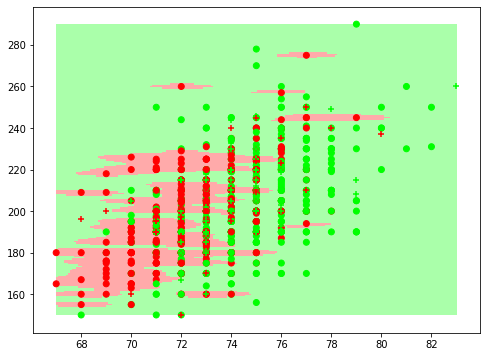

In [45]:
clf = SVC(C=0.5, gamma='auto', kernel='rbf')
plot_cat_model(clf, X, y)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

Training Error: 0.7001209189842805
Testing Error: 0.5922330097087378


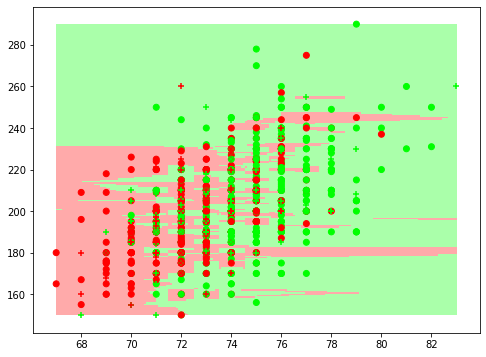

In [39]:
clf = KNeighborsClassifier(n_neighbors=3)
plot_cat_model(clf, X, y)

In [40]:
from sklearn.tree import DecisionTreeClassifier

Training Error: 0.6819830713422007
Testing Error: 0.6553398058252428


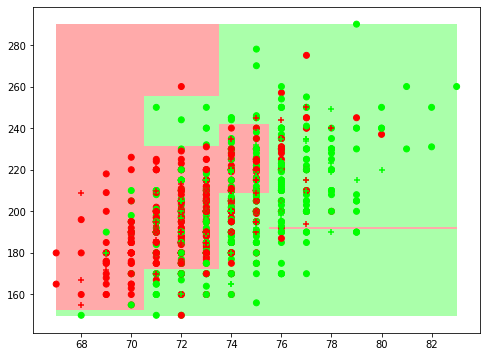

In [47]:
tree = DecisionTreeClassifier(max_depth=5)
plot_cat_model(tree, X, y)

In [42]:
from sklearn.ensemble import RandomForestClassifier

Training Error: 0.6759371221281741
Testing Error: 0.6262135922330098


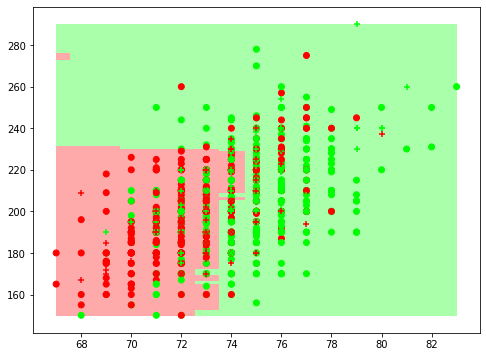

In [50]:
forest = RandomForestClassifier(n_estimators=100, max_depth=3)
plot_cat_model(forest, X, y)


## Neural Networks for Classification

For Classification the output layer has a cell for each class and a point is classified if the resulting class becomes activated (again the activation function for the cells is one of the parameters that can be set).

In [51]:
from sklearn.neural_network import MLPClassifier

Training Error: 0.49939540507859737
Testing Error: 0.5679611650485437


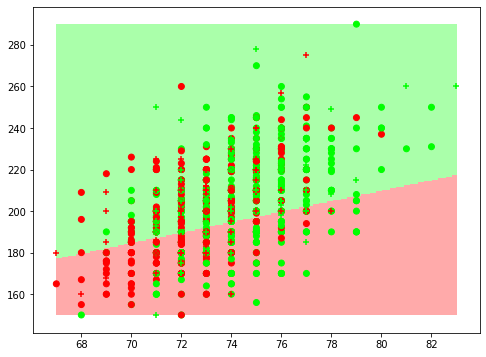

In [65]:
clf = MLPClassifier(hidden_layer_sizes = (10, 10, 10))
plot_cat_model(clf, X, y)

In this example the neural network does not respond particularly well, although interestingly it gives a much different classification model than the more rigid models above. 

Neural networks are especially capable when using a large number of features. Also for the sake of an example doing this we will do a multi-class problem which presents some difficulties.

In [66]:
ab = pa.read_csv('Data Sets/Abalone/abalone.csv', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole_Weight', 'Shucked_Weight',
                                                        'Viscera_Weight', 'Shell_Weight', 'Rings'])
ab.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [67]:
# One hot encoding for the 'Sex' feature

for k in ab.index:
    if ab.loc[k, 'Sex']=='M':
        ab.loc[k, 'Male']=1
    else: ab.loc[k, 'Male']=0
    if ab.loc[k, 'Sex']=='F':
        ab.loc[k, 'Female']=1
    else: ab.loc[k, 'Female']=0
    if ab.loc[k, 'Sex']=='I':
        ab.loc[k, 'Infant']=1
    else: ab.loc[k, 'Infant']=0
        
ab.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings,Male,Female,Infant
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1.0,0.0,0.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1.0,0.0,0.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.0,1.0,0.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1.0,0.0,0.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0,0.0,1.0


In [70]:
t = ab.Rings.mean()
for k in ab.index:
    if ab.loc[k, 'Rings'] < t:
        ab.loc[k, 'Age'] = 0
    else: ab.loc[k, 'Age'] = 1

In [71]:
keep = ['Length', 'Diameter', 'Height', 'Whole_Weight', 'Shucked_Weight', 
         'Viscera_Weight', 'Shell_Weight', 'Male', 'Female', 'Infant']
X = np.array( ab[ keep] )
y = np.array( ab['Rings'])


In [85]:
def fit_test_model(clf, X, y):
    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       # Then create the test
    y_test = y[:test]
    X_train = X[test:]     # and train sets
    y_train = y[test:]
    
    clf.fit(X_train, y_train) # Fit the model
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))

In [86]:
clf = LogisticRegression(solver = 'lbfgs', multi_class='auto', max_iter=500)
fit_test_model(clf, X, y)

Training Error: 0.2621184919210054
Testing Error: 0.29221556886227545


In [87]:
clf = LinearDiscriminantAnalysis()
fit_test_model(clf, X, y)

Training Error: 0.27767803710353084
Testing Error: 0.26467065868263473


/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Note that this problem kicks a warning because some of our variables are related. To fix this we should determine which variables are related and remove one, or we should use a pre-processing routine like PCA.

Because we are doing a multiclass problem and one of our classes only has one sample the Quadratic Discriminant Analysis does not apply. That is for one class there is no such thing as variance. This might also be causing the collinear warning above.

In [88]:
clf = SVC(C=1.0, gamma='auto', kernel='linear')
fit_test_model(clf, X, y)

Training Error: 0.2546379413524835
Testing Error: 0.23233532934131737


In [89]:
clf = SVC(C=1.0, gamma='auto', kernel='rbf')
fit_test_model(clf, X, y)

Training Error: 0.23877917414721722
Testing Error: 0.22395209580838324


In [104]:
clf = KNeighborsClassifier(n_neighbors=13)
fit_test_model(clf, X, y)

Training Error: 0.37223219628964693
Testing Error: 0.25988023952095807
